In [1]:
from glm.glmnet import ElasticNet, GLMNet
from glm.families import Gaussian, Bernoulli
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use('ggplot')

/Users/matthewdrury/anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/__init__.py:913: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
#s = StandardScaler()
#X = s.fit_transform(X)
#X[:, 0] = 1.0

In [3]:
enet = ElasticNet(lam=0.0, alpha=0.0)
enet.fit(X, y, sample_weights=sample_weights)

NameError: name 'X' is not defined

In [ ]:
enet.coef_

In [ ]:
lr = LinearRegression()
lr.fit(X, y)

In [ ]:
lr.coef_

In [ ]:
lambdas = np.logspace(np.log10(0.000001), np.log10(50))

In [ ]:
lambdas

In [ ]:
enets = []
for lam in lambdas:
    enet = ElasticNet(lam=lam, alpha=0.2)
    enet.fit(X, y)
    enets.append(enet.coef_)

In [ ]:
coef_paths = np.row_stack(enets)

In [ ]:
fig, ax = plt.subplots(figsize=(14, 4))

t = np.log(lambdas)
for idx in range(coef_paths.shape[1]):
    ax.plot(t, coef_paths[:, idx])

In [ ]:
enet.predict(X)

## GlmNet

In [4]:
X = np.empty(shape=(100000, 3))
X[:, 0] = 1.0
X[:, 1] = np.random.normal(size=100000)
X[:, 2] = np.random.normal(size=100000)
#X[:, 3] = 0.2*X[:, 1] + 0.8*np.random.normal(size=100000)
#X[:, 4] = -0.2*X[:, 1] + 0.8*np.random.normal(size=100000)
#X[:, 3] = np.random.normal(size=100000)
#X[:, 4] = np.random.normal(size=100000)

y = 1 + 0.05*X[:, 1] + np.random.normal(scale=0.2, size=100000)

sample_weights = np.random.uniform(size=100000)

In [5]:
lambdas = np.logspace(np.log10(0.0001), np.log10(10), num=200)
lambdas = lambdas[::-1]

In [6]:
gnet = GLMNet(family=Gaussian(), alpha=0.2, lambdas=lambdas, max_iter=11)

In [7]:
gnet.fit(X, y)

0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
2
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
2
3
4
5
6
7
8
9
0
1
2
0
1
2
3
4
5
6
7
8
9
0
1
2
0
1
2
3
4
5
6
7
8
9
0
1
2
0
1
2
3
4
5
6
7
8
9
0
1
2
0
1
2
3
4
5
6
7
8
9
0
1
2
0
1
2
3
4
5
6
7
8
9
0
1
2
0
1
2
3
4
5
6
7
8
9
0
1
2
0
1
2
3
4
5
6
7
8
9
0
1
2
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [8]:
coef_paths = np.row_stack([g.coef_ for g in gnet._enets])

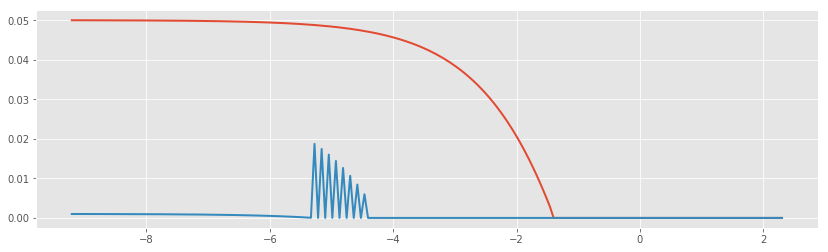

In [9]:
fig, ax = plt.subplots(figsize=(14, 4))

t = np.log(lambdas)
for idx in range(1, coef_paths.shape[1]):
    ax.plot(t, coef_paths[:, idx])

## Logit Net

In [ ]:
X = np.empty(shape=(100000, 6))
X[:, 0] = 1.0
X[:, 1] = np.random.normal(size=100000)
X[:, 2] = np.random.normal(size=100000)
#X[:, 3] = 0.2*X[:, 1] + 0.8*np.random.normal(size=100000)
#X[:, 4] = -0.2*X[:, 1] + 0.8*np.random.normal(size=100000)
X[:, 3] = np.random.normal(size=100000)
X[:, 4] = np.random.normal(size=100000)
X[:, 5] = np.random.normal(size=100000)

lp = 0.05*X[:, 1] - 0.1*X[:, 2] -0.1*X[:, 3] + 0.07*X[:, 5]
p = 1 / (1 + np.exp(-lp))
y = np.random.binomial(1, p=p, size=100000)

In [ ]:
s = StandardScaler()
X = s.fit_transform(X)
X[:, 0] = 1.0

In [ ]:
lambdas = np.logspace(np.log10(0.000001), np.log10(10), num=200)
lambdas = lambdas[::-1]

gnet = GLMNet(family=Bernoulli(), alpha=0.2, lambdas=lambdas)
gnet.fit(X, y)

In [ ]:
coef_paths = np.row_stack([g.coef_ for g in gnet._enets])

In [ ]:
fig, ax = plt.subplots(figsize=(14, 4))

t = np.log(lambdas)
for idx in range(coef_paths.shape[1]):
    ax.plot(t, coef_paths[:, idx])

In [ ]:
np.max(coef_paths)

In [ ]:
preds = np.row_stack([enet.predict(X) for enet in gnet._enets])

In [ ]:
np.min(preds)